## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Name: Charity Nduku Kanyua

Pace:Full time

TM Name: Diana Mongina

Blog URL

Loading the data

In [259]:
#Importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [260]:
#Loading the dataset
df = pd.read_csv("./data/Aviation_Data.csv")
df.head()

c:\Users\This pc\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

Data cleaning

In [262]:
#checking for duplicates
df.duplicated().value_counts()

False    88958
True      1390
dtype: int64

In [263]:
#drop duplicates
df = df.drop_duplicates()
df.duplicated().value_counts()

False    88958
dtype: int64

In [264]:
#checking columns with null values
df.isnull().sum()


Event.Id                     69
Investigation.Type            0
Accident.Number              69
Event.Date                   69
Location                    121
Country                     295
Latitude                  54576
Longitude                 54585
Airport.Code              38709
Airport.Name              36168
Injury.Severity            1069
Aircraft.damage            3263
Aircraft.Category         56671
Registration.Number        1386
Make                        132
Model                       161
Amateur.Built               171
Number.of.Engines          6153
Engine.Type                7146
FAR.Description           56935
Schedule                  76376
Purpose.of.flight          6261
Air.carrier               72310
Total.Fatal.Injuries      11470
Total.Serious.Injuries    12579
Total.Minor.Injuries      12002
Total.Uninjured            5981
Weather.Condition          4561
Broad.phase.of.flight     27234
Report.Status              6450
Publication.Date          15299
dtype: i

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88958 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88958 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [266]:
#removing columns that are not necessary for analysis and have too many missing values
df.drop(columns=["Latitude", "Longitude", "Airport.Name", "Airport.Code"], inplace=True)

In [267]:
df.isnull().sum()

Event.Id                     69
Investigation.Type            0
Accident.Number              69
Event.Date                   69
Location                    121
Country                     295
Injury.Severity            1069
Aircraft.damage            3263
Aircraft.Category         56671
Registration.Number        1386
Make                        132
Model                       161
Amateur.Built               171
Number.of.Engines          6153
Engine.Type                7146
FAR.Description           56935
Schedule                  76376
Purpose.of.flight          6261
Air.carrier               72310
Total.Fatal.Injuries      11470
Total.Serious.Injuries    12579
Total.Minor.Injuries      12002
Total.Uninjured            5981
Weather.Condition          4561
Broad.phase.of.flight     27234
Report.Status              6450
Publication.Date          15299
dtype: int64

In [268]:
df.dropna(axis=0, inplace=True)

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 22 to 34275
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                203 non-null    object 
 1   Investigation.Type      203 non-null    object 
 2   Accident.Number         203 non-null    object 
 3   Event.Date              203 non-null    object 
 4   Location                203 non-null    object 
 5   Country                 203 non-null    object 
 6   Injury.Severity         203 non-null    object 
 7   Aircraft.damage         203 non-null    object 
 8   Aircraft.Category       203 non-null    object 
 9   Registration.Number     203 non-null    object 
 10  Make                    203 non-null    object 
 11  Model                   203 non-null    object 
 12  Amateur.Built           203 non-null    object 
 13  Number.of.Engines       203 non-null    float64
 14  Engine.Type             203 non-null   

In [270]:
#getting the total number of injuries and fatalities
col_totals = df[["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries"]].sum()
col_totals

Total.Fatal.Injuries      115.0
Total.Serious.Injuries     89.0
Total.Minor.Injuries      155.0
dtype: float64

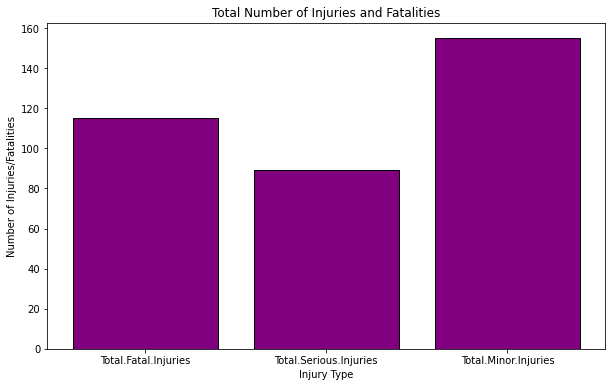

In [271]:
#number of injuries and fatalities
plt.figure(figsize=(10,6))
plt.bar(col_totals.index, col_totals.values, color="purple", edgecolor="black")
plt.xlabel("Injury Type")
plt.ylabel("Number of Injuries/Fatalities")
plt.title("Total Number of Injuries and Fatalities")
plt.show()

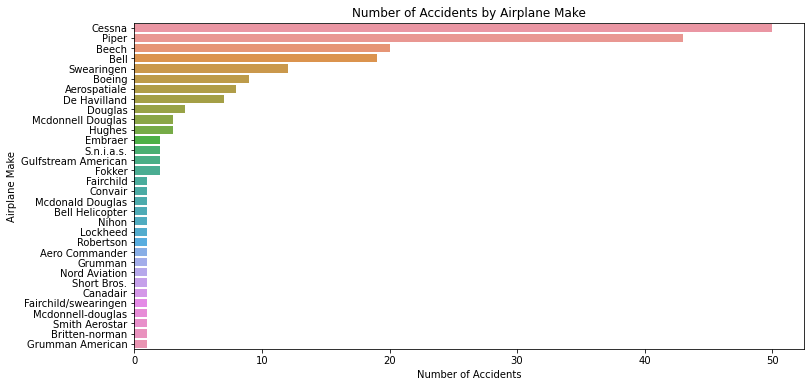

In [272]:
#number of accidents by airplane make
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Make', order=df["Make"].value_counts().index)
plt.title("Number of Accidents by Airplane Make")
plt.xlabel("Number of Accidents")
plt.ylabel("Airplane Make")
plt.show()

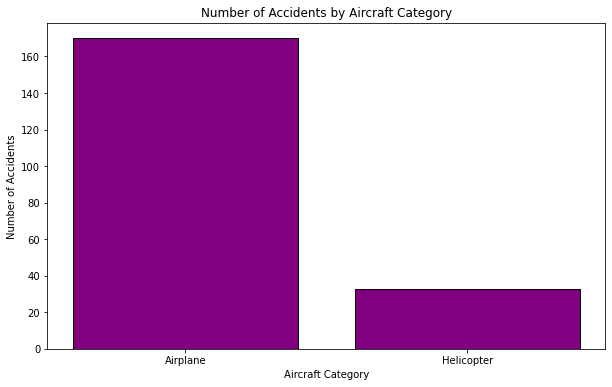

In [273]:
#number of accidents by aircraft category
plt.figure(figsize=(10,6))
plt.bar(df["Aircraft.Category"].value_counts().index, df["Aircraft.Category"].value_counts().values, color="purple", edgecolor="black")
plt.xlabel("Aircraft Category")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents by Aircraft Category")
plt.show()